# Machine Learning Algorithm to detect digits written by hand with Keras
Source of Information: https://keras.io/examples/vision/image_classification_from_scratch/

Einbinden der Bibliotheken

In [22]:
import os
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Einlesen des Datensatzes mnist

In [14]:
mnist = keras.datasets.mnist # 28x28 Bilder mit handgeschriebenen Ziffern (Zwischen 0 und 9)

Splitten des Datensatzes in Training und Test

In [15]:
# Bilder den 4 Variablen zuweisen
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Test if loaded correctly

5


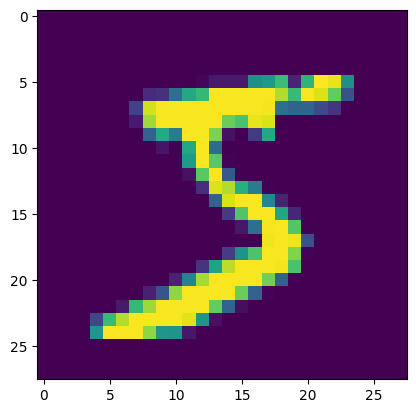

In [16]:
plt.imshow(x_train[0])
print(y_train[0])

Normalisierung der Daten

In [17]:
# x_train[0] = erstes Bild unseres Datensatzes in RGB mit Werten zwischen 0 und 255
x_train = keras.utils.normalize(x_train, axis=1) # nach Normalisierung Werte zwischen 0 und 1
# plt.imshow(x_train[0])
x_test = keras.utils.normalize(x_test, axis=1)

Erstellen und Training des Künstlichen Neuronalen Netzes

In [18]:
# Erstellen eines Models
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # gibt Wahrscheinlichkeiten der einzelnen Ziffern aus


In [19]:
# Definition der Parameter für Training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Training des Models mit bekannten Trainingsdaten
model.fit(x_train.reshape(60000, 784), y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2609 - accuracy: 0.9245
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9672
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0732 - accuracy: 0.9767


Testen des Models an unbekannten Testdaten

In [28]:
val_loss, val_acc = model.evaluate(x_test.reshape(-1, 784), y_test) #-1 bedeutet alle Testdaten (=10 000 Bilder)
print("Test Loss:", val_loss, "\nTest Accurancy:", val_acc) 

313/313 [==============================] - 1s 2ms/step - loss: 0.0891 - accuracy: 0.9722
Test Loss: 0.08911591023206711 
Test Accurancy: 0.9721999764442444


313/313 [==============================] - 1s 2ms/step
[3.45106287e-06 4.68908584e-05 1.72010132e-07 1.67878898e-04
 3.27616872e-04 2.57771375e-04 4.22353430e-10 1.37763135e-02
 1.23482998e-04 9.85296428e-01]
9


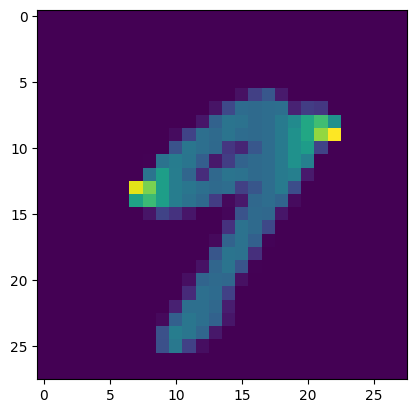

In [26]:
i = 21 # zufälliges Bild aus der Datenbank
predictions = model.predict(x_test.reshape(-1, 784))
print(predictions[i-1]) # Was befindet sich auf Bild 21 laut dem NN?
pred_i = predictions[i-1]
max_i = np.argmax(pred_i) # Welche Ziffer hat die höchste Wahrscheinlichkeit?
print(max_i)
plt.imshow(x_test[i-1])
plt.show()